# Notebook with Small examples

In [1]:
!pip install tensorly==0.5.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [3]:
import numpy as np
import random
import gzip
import math
import os

def make_dataset_easy():
    Nt=8
    data=np.zeros((Nt,3,3))

    #White square on left
    data[0]=np.array([[1,0,0],[1,0,0],[1,0,0]])
    data[1]=np.array([[1,0,0],[0,0,0],[0,0,0]])
    data[2]=np.array([[0,0,0],[1,0,0],[0,0,0]])
    data[3]=np.array([[0,0,0],[0,0,0],[1,0,0]])

    #White square on right
    data[4]=np.array([[0,0,1],[0,0,1],[0,0,1]])
    data[5]=np.array([[0,0,1],[0,0,0],[0,0,0]])
    data[6]=np.array([[0,0,0],[0,0,1],[0,0,0]])
    data[7]=np.array([[0,0,0],[0,0,0],[0,0,1]])

    #Creation of the labels
    y=np.array([[1,0],[1,0],[1,0],[1,0],[0,1],[0,1],[0,1],[0,1]])

    return (data,y)

def make_dataset_random(N,nbExample,nbClass):
    np.random.seed(123)

    #Creation of inputs
    data=np.random.random_sample((nbExample,N))

    #Creation of labels
    y=np.zeros((nbExample,nbClass)) 
    for ex in range(nbExample):
        y[ex,random.randint(0,nbClass-1)]=1

    return (data,y)

def load_MNIST_dataset(path):
    f = gzip.open(f'{path}/external/train-images-idx3-ubyte.gz','r')

    image_size = 28
    num_images = 60000

    f.read(16)
    buf = f.read(image_size * image_size * num_images)
    train_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    train_data = train_data.reshape(num_images, image_size, image_size)/256

    f.close()

    #Test images
    f = gzip.open(f'{path}/external/t10k-images-idx3-ubyte.gz','r')

    image_size = 28
    num_images = 10000

    f.read(16)
    buf = f.read(image_size * image_size * num_images)
    test_data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    test_data = test_data.reshape(num_images, image_size, image_size)/256

    f.close()

    #Training labels

    f = gzip.open(f'{path}/external/train-labels-idx1-ubyte.gz','r')

    num_images = 60000

    f.read(8)
    buf = f.read(1 * num_images)
    train_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)

    f.close()

    #Test labels

    f = gzip.open(f'{path}/external/t10k-labels-idx1-ubyte.gz','r')

    num_images = 10000

    f.read(8)
    buf = f.read(1 * num_images)
    test_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)

    f.close()

    return (train_data , test_data , train_labels , test_labels)

def convert_one_hot_encoding(labels):
    #Retrieval of the number of labels
    num_labels=labels.shape[0]

    #Computation of the number of classes
    num_class = np.max(labels) + 1
    new_labels=np.zeros((num_labels,num_class),dtype=np.int64)

    #Convertion of the labels
    for i in range(num_labels):
        new_labels[i,labels[i]]=1

    return new_labels

def make_MNIST_dataset_small(path):
    train_data , test_data , train_labels , test_labels = load_MNIST_dataset(path)

    #Training images
    num_images = 60000

    new_train_data=np.zeros((num_images,14,14))
    for k in range(num_images):
        for i in range(0,28,2):
            for j in range(0,28,2):
                new_train_data[k,int(i/2),int(j/2) ] = (train_data[k,i,j] + train_data[k,i+1,j] + train_data[k,i,j+1] + train_data[k,i+1,j+1])/4

    #Training images
    num_images = 10000

    new_test_data=np.zeros((num_images,14,14))
    for k in range(num_images):
        for i in range(0,28,2):
            for j in range(0,28,2):
                new_test_data[k,int(i/2),int(j/2) ] = (test_data[k,i,j] + test_data[k,i+1,j] + test_data[k,i,j+1] + test_data[k,i+1,j+1])/4

    
    #Saving the pictures in the folder processed
    np.save(f'{path}/processed/small_train_images.npy',new_train_data)
    np.save(f'{path}/processed/small_test_images.npy',new_test_data)

    return (new_train_data , new_test_data , train_labels , test_labels)

def load_MNIST_dataset_small(path):
    train_data = np.load(f'{path}/processed/small_train_images.npy')
    test_data = np.load(f'{path}/processed/small_test_images.npy')
    f = gzip.open(f'{path}/external/train-labels-idx1-ubyte.gz','r')

    num_images = 60000

    f.read(8)
    buf = f.read(1 * num_images)
    train_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)

    f.close()

    #Test labels

    f = gzip.open(f'{path}/external/t10k-labels-idx1-ubyte.gz','r')

    num_images = 10000

    f.read(8)
    buf = f.read(1 * num_images)
    test_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)

    f.close()

    return (train_data , test_data , train_labels , test_labels)
    
def load_subpart_MNIST_dataset_small(path,digits):
    train_data , test_data , train_labels , test_labels = load_MNIST_dataset_small(path)

    train_index = [i for i in range(len(train_data)) if train_labels[i] in digits]
    test_index = [i for i in range(len(test_data)) if test_labels[i] in digits]

    return (train_data[train_index] , test_data[test_index] , train_labels[train_index] , test_labels[test_index])
    

if __name__ == "__main__":
    path = "data"
    digits=[2,1]
    train_data , test_data , train_labels , test_labels = load_subpart_MNIST_dataset_small(path,digits)
    print(train_labels[0:10])
    print(test_labels[0:10])

    new_labels = convert_one_hot_encoding(train_labels)
    print(new_labels[0],train_labels[0])


[1 2 1 1 1 2 1 1 2 2]
[2 1 1 1 1 1 2 1 2 1]
[0 1 0] 1


In [34]:
def phi(x):
    return np.array([np.cos((np.pi*x)/2),np.sin((np.pi*x)/2)])

def Phi(img):
    return phi(img.reshape(-1,))

In [5]:
import tensorly as tl
def direction(u,s,v,sel,pos0,bond_dim,nmethod):
    if(nmethod==1):
        if(sel>pos0):
            v = v[0:bond_dim,:]  ; u =  u[:,0:bond_dim] @ np.diag(s)
        else:
            v = np.diag(s) @ v[0:bond_dim,:]  ; u =  u[:,0:bond_dim]
    if(nmethod==2):
        if(sel<pos0):
            v = v[0:bond_dim,:]  ; u =  u[:,0:bond_dim] @ np.diag(s)
        else:
            v = np.diag(s) @ v[0:bond_dim,:]  ; u =  u[:,0:bond_dim]
    return (u,v)

def SVD_matB(B,sel,pos0,maxalpha,cutoff,nmethod):
    u, s, v = np.linalg.svd(B,full_matrices=False)
    bond_dim=min(np.sum(s>cutoff),maxalpha)
    s=s[0:bond_dim]
    u , v = direction(u,s,v,sel,pos0,bond_dim,nmethod)
    return (u , v, bond_dim)

def SVD_B(sel,pos0,B,posL,N,maxalpha,cutoff,nmethod):
    dim=B.shape
    if(sel==0 or (sel==1 and sel>pos0) ):
        B=B.reshape(dim[0],dim[1]*dim[2])
        u, v , bond_dim = SVD_matB(B,sel,pos0,maxalpha,cutoff,nmethod)
        v= v.reshape(bond_dim,2,dim[2]).transpose((1,0,2))
    elif( (sel==posL-1 and sel< pos0) or (sel==posL and sel> pos0) ):
        B=B.reshape(dim[0]*dim[1],dim[2]*dim[3]*dim[4])
        u, v , bond_dim = SVD_matB(B,sel,pos0,maxalpha,cutoff,nmethod)
        u = u.reshape(2,dim[1],bond_dim)
        v= v.reshape(bond_dim,2,dim[3],dim[4]).transpose((1,0,2,3))
    elif( (sel==N-2 and sel< pos0 )or sel==N-1):
        B=B.reshape(dim[0]*dim[1],dim[2])
        u, v , bond_dim= SVD_matB(B,sel,pos0,maxalpha,cutoff,nmethod)
        u = u.reshape(2,dim[1],bond_dim)
        v= v.reshape(bond_dim,dim[2]).transpose((1,0))
    elif( (sel==posL and sel< pos0) or (sel==posL+1 and sel > pos0) ):
        B=B.reshape(dim[0]*dim[1]*dim[2],dim[3]*dim[4])
        u, v , bond_dim= SVD_matB(B,sel,pos0,maxalpha,cutoff,nmethod)
        u = u.reshape(2,dim[1],dim[2],bond_dim).transpose((0,1,3,2))
        v= v.reshape(bond_dim,2,dim[4]).transpose((1,0,2))
    else:
        B=B.reshape(dim[0]*dim[1],dim[2]*dim[3])
        u, v , bond_dim= SVD_matB(B,sel,pos0,maxalpha,cutoff,nmethod)
        u = u.reshape(2,dim[1],bond_dim)
        v= v.reshape(bond_dim,2,dim[3]).transpose((1,0,2))
    return (u,v)

if __name__ == "__main__":
    #test 1
    sel=5 ; pos0=6 ; posL=8 ; N=9 ; maxalpha = 10 ; cutoff=10**(-10)
    B=np.random.randn(2,10,2,20)
    u1 , v1 = SVD_B(sel,pos0,B,posL,N,maxalpha,cutoff,1)
    u2 , v2 = SVD_B(sel,pos0,B,posL,N,maxalpha,cutoff,2)
    print("##### U1 #####")
    print(u1.shape) 
    print("##### V1 #####")
    print(v1.shape)
    print("##### U2 #####")
    print(u2.shape)
    print("##### V2 #####") 
    print(v2.shape)
    

##### U1 #####
(2, 10, 10)
##### V1 #####
(2, 10, 20)
##### U2 #####
(2, 10, 10)
##### V2 #####
(2, 10, 20)


In [6]:
def DMRG_creation_B_Atilde(W,sel,pos0):
        A_tilde=W.copy() ; B_vec=[] ; B_vec.append(A_tilde.pop(sel))
        if(sel<pos0) : B_vec.append(A_tilde.pop(pos0-1)) 
        else : B_vec.append(A_tilde.pop(pos0))
                       
        if(sel<pos0):
            if(sel==0):
                B=tl.tenalg.contract(B_vec[0],1,B_vec[1],1)
            else:
                B=tl.tenalg.contract(B_vec[0],2,B_vec[1],1)

        if(sel>pos0):
            if(sel==1):
                B=tl.tenalg.contract(B_vec[1],1,B_vec[0],1)
            else:
                B=tl.tenalg.contract(B_vec[1],2,B_vec[0],1)

        return (B,A_tilde)

In [7]:
def DMRG_creation_phi_tilde12(A_tilde,Phi,sel,pos0,n,Min,N,nbTraining):
    Phi_tilde1=0 ; Phi_tilde2=0

    #Initialization of the static variables of the function (needeed so that the algorithm scales linearly with N)
    if(n==0 and sel == 0 and pos0 == 1):
        DMRG_creation_phi_tilde12.Phi_tilde1_table_to_right=[0]*nbTraining
        DMRG_creation_phi_tilde12.Phi_tilde1_table_to_left=[[0 for i in range(N-2)] for j in range(nbTraining)]
        DMRG_creation_phi_tilde12.Phi_tilde2_table_to_right=[[0 for i in range(N-2)] for j in range(nbTraining)]
        DMRG_creation_phi_tilde12.Phi_tilde2_table_to_left=[0]*nbTraining
    
    ##Construction of Phi_tilde1 to the right
    if(sel==1 and sel<pos0):
        DMRG_creation_phi_tilde12.Phi_tilde1_table_to_right[n]=tl.tenalg.mode_dot(A_tilde[0],Phi[:,0],0) #contractMPS(A_tilde[0:Min],Phi[:,:Min])
        Phi_tilde1=DMRG_creation_phi_tilde12.Phi_tilde1_table_to_right[n]

    if(sel!=0 and sel!=1 and sel<pos0):
        DMRG_creation_phi_tilde12.Phi_tilde1_table_to_right[n]=tl.tenalg.contract(A_tilde[Min-1],1,DMRG_creation_phi_tilde12.Phi_tilde1_table_to_right[n],0)
        DMRG_creation_phi_tilde12.Phi_tilde1_table_to_right[n]=tl.tenalg.mode_dot(DMRG_creation_phi_tilde12.Phi_tilde1_table_to_right[n],Phi[:,Min-1],0)
        Phi_tilde1=DMRG_creation_phi_tilde12.Phi_tilde1_table_to_right[n]

    ##Construction of Phi_tilde1 to the left
    if(sel==(N-1)):
        DMRG_creation_phi_tilde12.Phi_tilde1_table_to_left[n][0]=tl.tenalg.mode_dot(A_tilde[0],Phi[:,0],0)
        for i in range(1,N-2) :
            DMRG_creation_phi_tilde12.Phi_tilde1_table_to_left[n][i]=tl.tenalg.contract(A_tilde[i],1,DMRG_creation_phi_tilde12.Phi_tilde1_table_to_left[n][i-1],0)
            DMRG_creation_phi_tilde12.Phi_tilde1_table_to_left[n][i]=tl.tenalg.mode_dot(DMRG_creation_phi_tilde12.Phi_tilde1_table_to_left[n][i],Phi[:,i],0)
        Phi_tilde1=DMRG_creation_phi_tilde12.Phi_tilde1_table_to_left[n][N-3]

    if(sel>pos0 and  not(sel==1 and sel>pos0)):
        Phi_tilde1=DMRG_creation_phi_tilde12.Phi_tilde1_table_to_left[n][sel-2]

    ##Construction of Phi_tilde2 to the right
    if(sel==0):
        DMRG_creation_phi_tilde12.Phi_tilde2_table_to_right[n][N-3]=tl.tenalg.mode_dot(A_tilde[N-3],Phi[:,N-3],0)
        for i in range(N-4,-1,-1) :
            DMRG_creation_phi_tilde12.Phi_tilde2_table_to_right[n][i]=tl.tenalg.contract(A_tilde[i],2,DMRG_creation_phi_tilde12.Phi_tilde2_table_to_right[n][i+1],0)
            DMRG_creation_phi_tilde12.Phi_tilde2_table_to_right[n][i]=tl.tenalg.mode_dot(DMRG_creation_phi_tilde12.Phi_tilde2_table_to_right[n][i],Phi[:,i],0)
        Phi_tilde2=DMRG_creation_phi_tilde12.Phi_tilde2_table_to_right[n][0]

    if(sel!=0 and sel!=(N-2) and sel<pos0):
        Phi_tilde2=DMRG_creation_phi_tilde12.Phi_tilde2_table_to_right[n][sel]

    ##Construction of Phi_tilde2 to the left
    if(sel==N-2 and sel>pos0):
        DMRG_creation_phi_tilde12.Phi_tilde2_table_to_left[n]=tl.tenalg.mode_dot(A_tilde[N-3],Phi[:,N-3],0)
        Phi_tilde2=DMRG_creation_phi_tilde12.Phi_tilde2_table_to_left[n]

    if(sel != N-1 and sel!=N-2 and sel>pos0):
        DMRG_creation_phi_tilde12.Phi_tilde2_table_to_left[n]=tl.tenalg.contract(A_tilde[sel-1],2,DMRG_creation_phi_tilde12.Phi_tilde2_table_to_left[n],0)
        DMRG_creation_phi_tilde12.Phi_tilde2_table_to_left[n]=tl.tenalg.mode_dot(DMRG_creation_phi_tilde12.Phi_tilde2_table_to_left[n],Phi[:,sel-1],0)
        Phi_tilde2=DMRG_creation_phi_tilde12.Phi_tilde2_table_to_left[n]
        
    return (Phi_tilde1,Phi_tilde2)

In [8]:
def DMRG_creation_Phi_tilde(Phi_tilde1,Phi_tilde2,si,sel,pos0,posL,N):
    if(sel==0 or (sel==1 and sel>pos0) ):
        Phi_tilde=np.multiply.outer(si[:,1],Phi_tilde2) #Phi_tilde2(alpha2,l) => Phi_tilde(s2,alpha2,l)
        Phi_tilde=np.multiply.outer(si[:,0],Phi_tilde) #=> Phi_tilde(s1,s2,alpha2,l)
    elif( (sel==posL-1 and sel< pos0) or (sel==posL and sel> pos0) ):
        Phi_tilde=np.multiply.outer(si[:,0],Phi_tilde1) #=> Phi_tilde1(alpha(i-1)) => Phi_tilde1(si,alpha(i-1))
        Phi_tilde=np.multiply.outer(Phi_tilde,si[:,1]) #=> Phi_tilde(si,alpha(i-1),s(i+1))
        Phi_tilde=np.multiply.outer(Phi_tilde,Phi_tilde2) #=>Phi_tilde(si,alpha(i-1),s(i+1),alpha(i+1))
    elif( (sel==posL and sel< pos0) or (sel==posL+1 and sel > pos0)  ):
        Phi_tilde=np.multiply.outer(si[:,0],Phi_tilde1) #=> Phi_tilde1(alpha(i-1)) => Phi_tilde1(si,alpha(i-1))
        Phi_tilde=np.multiply.outer(Phi_tilde,si[:,1]) #=> Phi_tilde(si,alpha(i-1),s(i+1))
        Phi_tilde=np.multiply.outer(Phi_tilde,Phi_tilde2) #=>Phi_tilde(si,alpha(i-1),s(i+1),alpha(i+1))
    elif( (sel==N-2 and sel<pos0 ) or sel==N-1):
        Phi_tilde=np.multiply.outer(si[:,0],Phi_tilde1) #Phi_tilde1(alpha(N-2),l) =>Phi_tilde1(s(N-1),alpha(N-2),l)
        Phi_tilde=np.multiply.outer(Phi_tilde,si[:,1]) #=> Phi_tilde(s(N-1),alpha(N-2),l,sN)
    else:
        Phi_tilde=np.multiply.outer(si[:,0],Phi_tilde1) #=> Phi_tilde1(alpha(i-1)) => Phi_tilde1(si,alpha(i-1))
        Phi_tilde=np.multiply.outer(Phi_tilde,si[:,1]) #=> Phi_tilde(si,alpha(i-1),s(i+1))
        Phi_tilde=np.multiply.outer(Phi_tilde,Phi_tilde2) #=>Phi_tilde(si,alpha(i-1),s(i+1),alpha(i+1),l)
    return Phi_tilde

In [9]:
def DMRG_An_bn(Phi_tilde,Phi_tilde1,Phi_tilde2,si,sel,pos0,posL,N,y):
    temp1=si[:,0].reshape(2,1)
    An=np.dot(temp1,temp1.T)

    #Computation of the outer product for the second pixel
    temp1=si[:,1].reshape(2,1)
    An=np.multiply.outer(An,np.dot(temp1,temp1.T))
    
    #Computation of An and bn 
    if(sel==0 or (sel==1 and sel>pos0) ):
        temp2=np.dot(Phi_tilde2,Phi_tilde2.T)
        An=np.multiply.outer(An,temp2) #An -> (s1,s1,s2,s2,alpha2,alpha2)
        bn=tl.tenalg.mode_dot(Phi_tilde,y,3)
    elif( (sel==posL-1 and sel< pos0) or (sel==posL and sel> pos0) ):
        Phi_tilde1=Phi_tilde1.reshape(Phi_tilde1.shape[0],1) ; Phi_tilde2=Phi_tilde2.reshape(Phi_tilde2.shape[0],1)
        temp2=np.dot(Phi_tilde1,Phi_tilde1.T)
        An=np.multiply.outer(An,temp2)
        temp2=np.dot(Phi_tilde2,Phi_tilde2.T)
        An=np.multiply.outer(An,temp2) #An -> (sj,sj,sj+1,sj+1,alphaj-1,alphaj-1,alphaj+1,alphaj+1)
        An=An.transpose((0,1,4,5,2,3,6,7)) #An -> (sj,sj,alphaj-1,alphaj-1,sj+1,sj+1,alphaj+1,alphaj+1)
        bn=np.multiply.outer(Phi_tilde,y)
    elif( (sel==posL and sel< pos0) or (sel==posL+1 and sel > pos0)  ):
        Phi_tilde1=Phi_tilde1.reshape(Phi_tilde1.shape[0],1) ; Phi_tilde2=Phi_tilde2.reshape(Phi_tilde2.shape[0],1)
        temp2=np.dot(Phi_tilde1,Phi_tilde1.T)
        An=np.multiply.outer(An,temp2)
        temp2=np.dot(Phi_tilde2,Phi_tilde2.T)
        An=np.multiply.outer(An,temp2) #An -> (sj,sj,sj+1,sj+1,alphaj-1,alphaj-1,alphaj+1,alphaj+1)
        An=An.transpose((0,1,4,5,2,3,6,7)) #An -> (sj,sj,alphaj-1,alphaj-1,sj+1,sj+1,alphaj+1,alphaj+1)
        bn=np.multiply.outer(Phi_tilde,y)
        bn=bn.transpose((0,1,4,2,3))
    elif( (sel==N-2 and sel<pos0 ) or sel==N-1):
        temp2=np.dot(Phi_tilde1,Phi_tilde1.T)
        An=np.multiply.outer(An,temp2) #An -> (sN-1,sN-1,sN,sN,alphaN-2,alphaN-2)
        An=An.transpose((0,1,4,5,2,3)) #An -> (sN-1,sN-1,alphaN-2,alphaN-2,sN,sN)
        bn=tl.tenalg.mode_dot(Phi_tilde,y,2)
    else:
        if(sel<posL):
            Phi_tilde1=Phi_tilde1.reshape(Phi_tilde1.shape[0],1)
        else:
            Phi_tilde2=Phi_tilde2.reshape(Phi_tilde2.shape[0],1)
        temp2=np.dot(Phi_tilde1,Phi_tilde1.T)
        An=np.multiply.outer(An,temp2)
        temp2=np.dot(Phi_tilde2,Phi_tilde2.T)
        An=np.multiply.outer(An,temp2) #An -> (s2,s2,s3,s3,alpha1,alpha1,alpha3,alpha3)
        An=An.transpose((0,1,4,5,2,3,6,7)) #An -> (s2,s2,alpha1,alpha1,s3,s3,alpha3,alpha3)
        if(sel<posL):
            bn=tl.tenalg.mode_dot(Phi_tilde,y,4)
        else:
            bn=tl.tenalg.mode_dot(Phi_tilde,y,2)
    return (An,bn)

In [10]:
def DMRG_compute_stuff_gradient(Phi_tilde1,Phi_tilde2,si,sel,pos0,posL,N,y):
    #Computation of Phi_tilde
    Phi_tilde = DMRG_creation_Phi_tilde(Phi_tilde1,Phi_tilde2,si,sel,pos0,posL,N)

    #Computation of An and bn
    An,bn = DMRG_An_bn(Phi_tilde,Phi_tilde1,Phi_tilde2,si,sel,pos0,posL,N,y)

    return (An,bn,Phi_tilde)

In [14]:
def DMRG_compute_cost(B,Phi_tilde,y,sel,pos0,posL,N,loss_function,eps=10**(-10)):
    if(sel==0 or (sel==1 and sel>pos0) ):
        fl=tl.tenalg.contract(B,(0,1,2),Phi_tilde,(0,1,2))
    elif( (sel==posL-1 and sel< pos0) or (sel==posL and sel> pos0) ):
        fl=tl.tenalg.contract(B,(0,1,2,3),Phi_tilde,(0,1,2,3))
    elif( (sel==posL and sel< pos0) or (sel==posL+1 and sel > pos0)  ):
        fl=tl.tenalg.contract(B,(0,1,3,4),Phi_tilde,(0,1,2,3))
    elif( (sel==N-2 and sel<pos0 ) or sel==N-1):
        fl=tl.tenalg.contract(B,(0,1,2),Phi_tilde,(0,1,3))
    else:
        if(sel>posL):
            fl=tl.tenalg.contract(B,(0,1,2,3),Phi_tilde,(0,1,3,4))
        else:
            fl=tl.tenalg.contract(B,(0,1,2,3),Phi_tilde,(0,1,2,3))
    
    #Computation of the loss
    if loss_function =="quadratic":
        cost = (1/2)*np.power(fl-y,2)
    elif loss_function == "cross-entropy":
        cost = -y*np.log(np.exp(fl)/(sum(np.exp(fl)))+eps)
    elif loss_function =="log-quadratic":
        cost = (1/2)*np.log(np.power(fl-y,2)+1)

    #Summation over labels of the loss 
    return sum(cost)

In [15]:
def DMRG_compute_gradient(A,b,B,sel,pos0,posL,N,Phi_tilde=[],loss_function="quadratic",label=[],eps=10**(-16)):
    if(loss_function == "quadratic"):
        if(sel==0 or (sel==1 and sel>pos0) ):
            gradB=tl.tenalg.contract(A,(0,2,4),B,(0,1,2))-b
        elif( (sel==posL-1 and sel< pos0) or (sel==posL and sel> pos0) ):
            gradB=tl.tenalg.contract(A,(0,2,4,6),B,(0,1,2,3))-b 
        elif( (sel==posL and sel< pos0) or (sel==posL+1 and sel > pos0)  ):
            gradB=tl.tenalg.contract(A,(0,2,4,6),B,(0,1,3,4)).transpose((0,1,4,2,3))-b 
        elif( (sel==N-2 and sel<pos0 ) or sel==N-1):
            gradB=tl.tenalg.contract(A,(0,2,4),B,(0,1,2))-b
        else:
            gradB=tl.tenalg.contract(A,(0,2,4,6),B,(0,1,2,3))-b
    elif(loss_function == "cross-entropy"):
        gradB=0
        for i in range(len(Phi_tilde)):
            elem=Phi_tilde[i]
            y=label[i,:]
            if(sel==0 or (sel==1 and sel>pos0) ):
                fl=tl.tenalg.contract(B,(0,1,2),elem,(0,1,2))
                gradf=np.exp(fl)/(sum(np.exp(fl))+eps)-y
                gradB+=tl.tenalg.mode_dot(elem,gradf,3) #=> gradB(s1,s2,alpha2)
            elif( (sel==posL-1 and sel< pos0) or (sel==posL and sel> pos0) ):
                fl=tl.tenalg.contract(B,(0,1,2,3),elem,(0,1,2,3))
                gradf=np.exp(fl)/(sum(np.exp(fl))+eps)-y
                gradB+=np.multiply.outer(elem,gradf) #gradB(si,alpha(i-1),s(i+1),alpha(i+1),l)
            elif( (sel==posL and sel< pos0) or (sel==posL+1 and sel > pos0)  ):
                fl=tl.tenalg.contract(B,(0,1,3,4),elem,(0,1,2,3))
                gradf=np.exp(fl)/(sum(np.exp(fl))+eps)-y
                gradf=np.multiply.outer(elem,gradf) #=>gradf(si,alpha(i-1),s(i+1),alpha(i+1),l)
                gradB+=gradf.transpose((0,1,4,2,3)) #=>gradB(si,alpha(i-1),l,s(i+1),alpha(i+1))
            elif( (sel==N-2 and sel<pos0 ) or sel==N-1):
                fl=tl.tenalg.contract(B,(0,1,2),elem,(0,1,3))
                gradf=np.exp(fl)/(sum(np.exp(fl))+eps)-y
                gradB+=tl.tenalg.mode_dot(elem,gradf,2) #=> gradB(s(N-1),alpha(N-2),sN)
            else:
                if(sel>posL):
                    fl=tl.tenalg.contract(B,(0,1,2,3),elem,(0,1,3,4))
                    gradf=np.exp(fl)/(sum(np.exp(fl))+eps)-y
                    gradB+=tl.tenalg.mode_dot(elem,gradf,2) #gradB(si,alpha(i-1),s(i+1),alpha(i+1))
                else:
                    fl=tl.tenalg.contract(B,(0,1,2,3),elem,(0,1,2,3))
                    gradf=np.exp(fl)/(sum(np.exp(fl))+eps)-y
                    gradB+=tl.tenalg.mode_dot(elem,gradf,4) #gradB(si,alpha(i-1),s(i+1),alpha(i+1))
    elif(loss_function == "log-quadratic"):
        gradB=0
        for i in range(len(Phi_tilde)):
            elem=Phi_tilde[i]
            y=label[i,:]
            if(sel==0 or (sel==1 and sel>pos0) ):
                fl=tl.tenalg.contract(B,(0,1,2),elem,(0,1,2))
                gradf=(fl-y)/(np.power(fl-y,2)+1)
                gradB+=tl.tenalg.mode_dot(elem,gradf,3) #=> gradB(s1,s2,alpha2)
            elif( (sel==posL-1 and sel< pos0) or (sel==posL and sel> pos0) ):
                fl=tl.tenalg.contract(B,(0,1,2,3),elem,(0,1,2,3))
                gradf=(fl-y)/(np.power(fl-y,2)+1)
                gradB+=np.multiply.outer(elem,gradf) #gradB(si,alpha(i-1),s(i+1),alpha(i+1),l)
            elif( (sel==posL and sel< pos0) or (sel==posL+1 and sel > pos0)  ):
                fl=tl.tenalg.contract(B,(0,1,3,4),elem,(0,1,2,3))
                gradf=(fl-y)/(np.power(fl-y,2)+1)
                gradf=np.multiply.outer(elem,gradf) #=>gradf(si,alpha(i-1),s(i+1),alpha(i+1),l)
                gradB+=gradf.transpose((0,1,4,2,3)) #=>gradB(si,alpha(i-1),l,s(i+1),alpha(i+1))
            elif( (sel==N-2 and sel<pos0 ) or sel==N-1):
                fl=tl.tenalg.contract(B,(0,1,2),elem,(0,1,3))
                gradf=(fl-y)/(np.power(fl-y,2)+1)
                gradB+=tl.tenalg.mode_dot(elem,gradf,2) #=> gradB(s(N-1),alpha(N-2),sN)
            else:
                if(sel>posL):
                    fl=tl.tenalg.contract(B,(0,1,2,3),elem,(0,1,3,4))
                    gradf=(fl-y)/(np.power(fl-y,2)+1)
                    gradB+=tl.tenalg.mode_dot(elem,gradf,2) #gradB(si,alpha(i-1),s(i+1),alpha(i+1))
                else:
                    fl=tl.tenalg.contract(B,(0,1,2,3),elem,(0,1,2,3))
                    gradf=(fl-y)/(np.power(fl-y,2)+1)
                    gradB+=tl.tenalg.mode_dot(elem,gradf,4) #gradB(si,alpha(i-1),s(i+1),alpha(i+1))
    
    return gradB


In [47]:
if __name__ == "__main__":

    #test de la fonction creation_B_Atilde
    t1=np.array([[1,0],[0,4]])
    t2=np.array([[[1,0],[0,1]],[[2,0],[0,0]]])
    t3=np.array([[0,1],[2,3]])
    W=[t1,t2,t3]
    sel=1 ; pos0=2
    B , A_tilde = DMRG_creation_B_Atilde(W,sel,pos0)

    #test de la fonction DMRG_creation_phi_tilde
    n=0 ; Min=min(sel,pos0) ; N=9 ; nbTraining=30 ; posL=2
    p1=np.array([1,0]) ; p2=np.array([0,2]) ; p3=np.array([1,1])
    Phi=np.array([p1,p2,p3]).T

#     (Phi_tilde1,Phi_tilde2) = DMRG_creation_phi_tilde12(A_tilde,Phi,sel,pos0,n,Min,N,nbTraining)

#     print(Phi_tilde1)

In [18]:
def AGD_creation_phi_tilde(A_tilde,Phi,sel,n,N,nbTraining):
    Phi_tilde1 = 0 ; Phi_tilde2 = 0 

    if(n==0 and sel == 0):
        AGD_creation_phi_tilde.Phi_tilde1_table=[0]*nbTraining
        AGD_creation_phi_tilde.Phi_tilde2_table=[[0 for i in range(N-1)] for j in range(nbTraining)]

    #Construction of phi_tilde1
    if(sel==1):
        AGD_creation_phi_tilde.Phi_tilde1_table[n]=tl.tenalg.mode_dot(A_tilde[0],Phi[:,0],0) 
        Phi_tilde1=AGD_creation_phi_tilde.Phi_tilde1_table[n]

    if(sel!=0 and sel!=1):
        AGD_creation_phi_tilde.Phi_tilde1_table[n]=tl.tenalg.mode_dot(A_tilde[sel-1],AGD_creation_phi_tilde.Phi_tilde1_table[n],1)
        AGD_creation_phi_tilde.Phi_tilde1_table[n]=tl.tenalg.mode_dot(AGD_creation_phi_tilde.Phi_tilde1_table[n],Phi[:,sel-1],0)
        Phi_tilde1=AGD_creation_phi_tilde.Phi_tilde1_table[n]

    #Construction of phi_tilde2
    if(sel==0):
        AGD_creation_phi_tilde.Phi_tilde2_table[n][N-2]=tl.tenalg.mode_dot(A_tilde[N-2],Phi[:,N-2],0)
        for i in range(N-3,-1,-1) :
            AGD_creation_phi_tilde.Phi_tilde2_table[n][i]=tl.tenalg.contract(A_tilde[i],2,AGD_creation_phi_tilde.Phi_tilde2_table[n][i+1],0)
            AGD_creation_phi_tilde.Phi_tilde2_table[n][i]=tl.tenalg.mode_dot(AGD_creation_phi_tilde.Phi_tilde2_table[n][i],Phi[:,i],0)
        Phi_tilde2=AGD_creation_phi_tilde.Phi_tilde2_table[n][0]
        
    if(sel!=0  and sel!=(N-1)):
        Phi_tilde2=AGD_creation_phi_tilde.Phi_tilde2_table[n][sel]

    return (Phi_tilde1, Phi_tilde2 )

def AGD_calcul_cout_gradient(A,Phi_tilde1,Phi_tilde2,si,y,sel,N):
    if(sel==0):
        Phi_tilde=np.multiply.outer(si,Phi_tilde2) #Phi_tilde2(alpha1,l) => Phi_tilde(s1,alpha1,l)
        fl=tl.tenalg.contract(A,(0,1),Phi_tilde,(0,1))-y # => vecteur de taille l
        gradW=tl.tenalg.mode_dot(Phi_tilde,fl,2) # => gradW(s1,alpha1)
    elif(sel==N-1):
        Phi_tilde=np.multiply.outer(si,Phi_tilde1) #Phi_tilde1(alpha(N-1)) => Phi_tilde(sN,alpha(N-1))
        fl=tl.tenalg.contract(A,(0,1),Phi_tilde,(0,1))-y #=> vecteur de taille l
        gradW=np.multiply.outer(Phi_tilde,fl) # => gradW(sN,alpha(N-1),l)
    else:
        Phi_tilde=np.multiply.outer(si,Phi_tilde1) #=> Phi_tilde1(alpha(i-1)) => Phi_tilde1(si,alpha(i-1))
        Phi_tilde=np.multiply.outer(Phi_tilde,Phi_tilde2) # Phi_tilde2(alpha(i),l) => Phi_tilde(si,alpha(i-1),alpha(i),l)
        fl=tl.tenalg.contract(A,(0,1,2),Phi_tilde,(0,1,2))-y # => vecteur de taille l
        gradW=tl.tenalg.mode_dot(Phi_tilde,fl,3) # => gradW(si,alpha(i-1),alpha(i))
    cost = sum([i**2 for i in fl])

    return ( cost , gradW )

In [19]:
def ConjugateGradient(A,b,Npass,B,sel,pos0,posL,N,nbTraining,cutoff):
    #Computation of the gradient
    gradB = DMRG_compute_gradient(A,b,B,sel,pos0,posL,N)

    #Initialization of r and p
    r=-gradB
    p=r

    #Computation of the norm of r
    if(sel==0 or (sel==1 and sel>pos0) ):
        r_prod = tl.tenalg.contract(r,(0,1,2),r,(0,1,2))
    elif( (sel==posL-1 and sel< pos0) or (sel==posL and sel> pos0) ):
        r_prod = tl.tenalg.contract(r,(0,1,2,3,4),r,(0,1,2,3,4))
    elif( (sel==posL and sel< pos0) or (sel==posL+1 and sel > pos0)  ):
        r_prod = tl.tenalg.contract(r,(0,1,2,3,4),r,(0,1,2,3,4))
    elif( (sel==N-2 and sel<pos0 ) or sel==N-1):
        r_prod = tl.tenalg.contract(r,(0,1,2),r,(0,1,2))
    else:
        r_prod = tl.tenalg.contract(r,(0,1,2,3),r,(0,1,2,3))

    #Loop over Npass
    for _i in range(Npass): 
        if _i==0 and tl.norm(r,1) < cutoff :
            break
        
        if(sel==0 or (sel==1 and sel>pos0) ):
            Ap = tl.tenalg.contract(A,(0,2,4),p,(0,1,2))
            alpha = r_prod/(tl.tenalg.contract(p,(0,1,2),Ap,(0,1,2)))
            B = B + alpha*p
            r=r-alpha*Ap
            rnew_prod = tl.tenalg.contract(r,(0,1,2),r,(0,1,2))
            if tl.norm(r,1) < cutoff :
                break
            p= r + (rnew_prod/r_prod)*p
            r_prod = rnew_prod
        elif( (sel==posL-1 and sel< pos0) or (sel==posL and sel> pos0) ):
            Ap = tl.tenalg.contract(A,(0,2,4,6),p,(0,1,2,3))
            alpha = r_prod/(tl.tenalg.contract(p,(0,1,2,3,4),Ap,(0,1,2,3,4)))
            B = B + alpha*p
            r=r-alpha*Ap
            rnew_prod = tl.tenalg.contract(r,(0,1,2,3,4),r,(0,1,2,3,4))
            if tl.norm(r,1) < cutoff :
                break
            p= r + (rnew_prod/r_prod)*p
            r_prod = rnew_prod
        elif( (sel==posL and sel< pos0) or (sel==posL+1 and sel > pos0)  ):
            Ap = tl.tenalg.contract(A,(0,2,4,6),p,(0,1,3,4)).transpose((0,1,4,2,3))
            alpha = r_prod/(tl.tenalg.contract(p,(0,1,2,3,4),Ap,(0,1,2,3,4)))
            B = B + alpha*p
            r=r-alpha*Ap
            rnew_prod = tl.tenalg.contract(r,(0,1,2,3,4),r,(0,1,2,3,4))
            if tl.norm(r,1) < cutoff :
                break
            p= r + (rnew_prod/r_prod)*p
            r_prod = rnew_prod
        elif( (sel==N-2 and sel<pos0 ) or sel==N-1):
            Ap = tl.tenalg.contract(A,(0,2,4),p,(0,1,2))
            alpha = r_prod/(tl.tenalg.contract(p,(0,1,2),Ap,(0,1,2)))
            B = B + alpha*p
            r=r-alpha*Ap
            rnew_prod = tl.tenalg.contract(r,(0,1,2),r,(0,1,2))
            if tl.norm(r,1) < cutoff :
                break
            p= r + (rnew_prod/r_prod)*p
            r_prod = rnew_prod
        else:
            Ap = tl.tenalg.contract(A,(0,2,4,6),p,(0,1,2,3))
            alpha = r_prod/(tl.tenalg.contract(p,(0,1,2,3),Ap,(0,1,2,3)))
            B = B + alpha*p
            r=r-alpha*Ap
            rnew_prod = tl.tenalg.contract(r,(0,1,2,3),r,(0,1,2,3))
            if tl.norm(r,1) < cutoff :
                break
            p= r + (rnew_prod/r_prod)*p
            r_prod = rnew_prod
    return B

def gradient_descent_fixed_stepsize(A,b,B,sel,pos0,posL,N,alpha,nbTraining,cutoff,Npass,Phi_tilde,loss_function,label):
    i=0
    gradB=0
    while( (i==0 or tl.norm(gradB,2) > cutoff ) and i<Npass):
        gradB = DMRG_compute_gradient(A,b,B,sel,pos0,posL,N,Phi_tilde,loss_function,label)
        B=B-alpha*gradB/nbTraining
        i=i+1
    return B

def Adam(A,b,B,sel,pos0,posL,N,alpha,nbTraining,cutoff,Npass,Phi_tilde,loss_function,label,beta1 = 0.9, beta2 = 0.999,eps=10**(-10)):
    i=0
    gradB=0 ; vdB = 0; sdB = 0
    while( (i==0 or tl.norm(gradB,2) > cutoff ) and i<Npass):
        i=i+1
        gradB = DMRG_compute_gradient(A,b,B,sel,pos0,posL,N,Phi_tilde,loss_function,label)

        # Moving average of the gradients
        vdB = beta1*vdB +(1-beta1)*gradB

        # Compute bias-corrected first moment estimate
        v_cor = vdB/(1-beta1**i)

        # Moving average of the squared gradients
        sdB = beta2*sdB +(1-beta2)*np.power(gradB,2)

        # Compute bias-corrected second raw moment estimate
        s_cor = sdB/(1-beta2**i)

        # Update parameter
        B=B-alpha*v_cor/(np.sqrt(s_cor)+eps)
        
    return B



In [20]:
import numpy as np
import tensorly as tl

def contractMPS(W,Phi): 
    res=tl.tenalg.mode_dot(W[0],Phi[:,0],0)
    if(len(W)>1):
        if(len(W[0].shape)==2):
            res=tl.tenalg.contract(W[1],1,res,0)
        else:
            res=tl.tenalg.contract(W[1],1,res,1)
        res=tl.tenalg.mode_dot(res,Phi[:,1],0)

    #Do all the contractions that are left
    for i in range(2,len(W)):
        res=tl.tenalg.contract(W[i],1,res,0)  
        res=tl.tenalg.mode_dot(res,Phi[:,i],0)

    return(res)

if __name__ == "__main__":
    #test de la fonction contractMPS
    t1=np.array([[1,0],[0,4]])
    t2=np.array([[[1,0],[0,1]],[[2,0],[0,0]]])
    t3=np.array([[0,1],[2,3]])
    p1=np.array([1,0]) ; p2=np.array([0,2]) ; p3=np.array([1,1])
    W=[t1,t2,t3]
    phi=np.array([p1,p2,p3]).T
    print(contractMPS(W,phi))

8


In [37]:
class ModelMPS :
    def __init__(self,N,diml,W=[]):
        self.N=N 
        self.diml=diml 
        self.W=W.copy() 
        self.nbSweep=0

    def onesInitialization(self,dimalpha,posL=-1,M=-1,goal=1,data=[],sigma=0):

        self.posL = posL

        #Computation of M
        if(M==-1):
            if(len(data)==0):
                M=((np.sqrt(3)+0.80)/2)**(self.N)
            else:
                M=0
                for example in data:
                    M_ite = np.prod([np.cos(np.pi/2*elem) + np.sin(np.pi/2*elem) for elem in example])
                    if M_ite>M:
                        M=M_ite

        #Computation of the constant value which is equal to all the terms of the tensors of the MPS form
        mfact=(goal)**(1/self.N)/(dimalpha**(1-(1/self.N))*M**(1/self.N))

        #Initialization of the label index
        if(posL==-1):
            self.posL=math.floor(self.N/2) #le tenseur qui portera l
        
        if(self.algo == "GD"):
            self.posL=self.N-1

        #Initialization of tensors
        self.W.append(np.ones((2,dimalpha))*mfact+sigma*np.random.randn(2,dimalpha)) #dim1 s(1), dim2 alpha(1) 
        for i in range(1,self.N-1):
            if(i==self.posL):
                self.W.append(np.ones((2,dimalpha,dimalpha,self.diml))*mfact+sigma*np.random.randn(2,dimalpha,dimalpha,self.diml)) # dim1 : s(i) , dim2 alpha(i) ,dim3 alpha(i+1) ,dim4 l
            else:
                self.W.append(np.ones((2,dimalpha,dimalpha))*mfact+sigma*np.random.randn(2,dimalpha,dimalpha)) # dim1 : s(i) , dim2 alpha(i) ,dim3 alpha(i+1)
        if(self.algo=="DMRG"):
            self.W.append(np.ones((2,dimalpha))*mfact+sigma*np.random.randn(2,dimalpha))  # dim1 : s(N) , dim2 alpha(N) 
        else:
            self.W.append(np.ones((2,dimalpha,self.diml))*mfact+sigma*np.random.randn(2,dimalpha,self.diml))  # dim1 : s(N) , dim2 alpha(N) , dim3 l

    def normalInitialization(self,dimalpha,mfact=0.95,mu=0,posL=-1):
        self.posL = posL

        #Initialization of the label index
        if(posL==-1):
            self.posL=math.floor(self.N/2) #le tenseur qui portera l
        
        if(self.algo == "GD"):
            self.posL=self.N-1

        #Initialization of tensors
        self.W.append(mu+np.random.randn(2,dimalpha)*mfact) #dim1 s(1), dim2 alpha(1) 
        for i in range(1,self.N-1):
            if(i==self.posL and self.algo=="DMRG"):
                self.W.append(mu+np.random.randn(2,dimalpha,dimalpha,self.diml)*mfact) # dim1 : s(i) , dim2 alpha(i) ,dim3 alpha(i+1) ,dim4 l
            else:
                self.W.append(mu+np.random.randn(2,dimalpha,dimalpha)*mfact) # dim1 : s(i) , dim2 alpha(i) ,dim3 alpha(i+1)
        if(self.algo=="DMRG"):
            self.W.append(mu+np.random.randn(2,dimalpha)*mfact)  # dim1 : s(N) , dim2 alpha(N)
        else:
            self.W.append(mu+np.random.randn(2,dimalpha,self.diml)*mfact) # dim1 : s(N) , dim2 alpha(N) , dim3 l

    def choose_loss_function(self,loss_function):
        self.loss_function = loss_function

    def choose_algo(self,algo_name):
        self.algo=algo_name
    
    def choose_optimizer(self,optimizer_name):
        self.optimizer = optimizer_name

    def trainDMRG(self,data_x,label,alpha=10**(-1),Npass=4,nmethod=1,maxalpha=10,cutoff=10**(-10)):        
        #Retrevial of the number of inputs and initialization of the error and all the steps of the algorithm
        err=[]
        nbTraining = data_x.shape[0]
        poss=[i for i in range(0,self.N)] +[i for i in range(0,self.N-1)][::-1]
        
        #Incrementation of the number of total sweeps
        self.nbSweep+=2
        
        #Loop over all the possibilities/steps
        for _e in range(2*(self.N-1)):
            #Initialization of the cost of the iteration and the tab which contains all the Phi_tilde
            cost=0  
            Phi_tilde_tab = []

            #Retrevial of impotant parameters of the step
            sel=poss.pop(0)
            Max=max(sel,poss[0])
            Min=min(sel,poss[0])

            #Construction of B and A_tilde and also initialization of A and b for the conjugate gradient
            (B,A_tilde)=DMRG_creation_B_Atilde(self.W,sel,poss[0])
            A=0 ; b=0

            #Loop over all the training data
            for n in range(nbTraining):

                #Flatten the data and compute Phi
                img=data_x[n].flatten()
                si=phi(img[[Min,Max]]) ; Phi=phi(np.delete(img,(sel,poss[0])))

                #Construction of phi_tilde1 and phi_tilde2
                (Phi_tilde1,Phi_tilde2) = DMRG_creation_phi_tilde12(A_tilde,Phi,sel,poss[0],n,Min,self.N,nbTraining)

                #Construction of An, bn and Phi_tilde
                An , bn , Phi_tilde = DMRG_compute_stuff_gradient(Phi_tilde1,Phi_tilde2,si,sel,poss[0],self.posL,self.N,label[n,:])
                
                #According to the loss function, either the method increments A and b, or it stocks Phi_tilde
                if self.loss_function == "quadratic":
                    A+=An ; b+=bn 
                elif self.loss_function == "log-quadratic" or self.loss_function == "cross-entropy":
                    Phi_tilde_tab.append(Phi_tilde)

                #Computation of the cost
                cost += DMRG_compute_cost(B,Phi_tilde,label[n,:],sel,poss[0],self.posL,self.N,self.loss_function)
                
            #Computation of the total cost of the step
            err.append( cost/nbTraining )

            #Optimization step
            if(self.optimizer=="GD"):
                B = gradient_descent_fixed_stepsize(A,b,B,sel,poss[0],self.posL,self.N,alpha,nbTraining,cutoff,Npass,Phi_tilde_tab,self.loss_function,label)
            elif(self.optimizer=="CG"):
                B = ConjugateGradient(A,b,Npass,B,sel,poss[0],self.posL,self.N,nbTraining,cutoff)
            elif(self.optimizer=="Adam"):
                B = Adam(A,b,B,sel,poss[0],self.posL,self.N,alpha,nbTraining,cutoff,Npass,Phi_tilde_tab,self.loss_function,label)
            
            #Computation of the SVD in order to find back the 2 tensors
            (self.W[Min],self.W[Max])=SVD_B(sel,poss[0],B,self.posL,self.N,maxalpha,cutoff,nmethod)


        return err

    def trainAGD(self,data_x,label,alpha):

        #Retrevial of the number of inputs and initialization of the error and all the steps of the algorithm
        err=[]
        nbTraining = data_x.shape[0]

        #Incrementation of the number of total sweeps
        self.nbSweep+=1

        #Loop over all the possibilities/steps
        for e in range(self.N):

            #Initialization of the cost and the gradient of the iteration 
            gradW=0
            cost=0

            #Retrevial of the tensor to be optimized
            sel=e%self.N

            #Construction of A and A_tilde
            A_tilde=self.W.copy() ; A=A_tilde.pop(sel)

            #Loop over all the training data
            for n in range(nbTraining):
                
                #Flatten the data and compute Phi
                img=data_x[n].flatten()
                si=phi(img[sel]) ; Phi=phi(np.delete(img,sel))

                #Construction of phi_tilde1 and phi_tilde2
                (Phi_tilde1,Phi_tilde2) = AGD_creation_phi_tilde(A_tilde,Phi,sel,n,self.N,nbTraining)

                #Computation of the cost and gradient of the step
                (cost_ite,grad_ite)=AGD_calcul_cout_gradient(A,Phi_tilde1,Phi_tilde2,si,label[n,:],sel,self.N)
                cost+=cost_ite ; gradW+=grad_ite

            #Optimization step : A gradient descent step with fixed stepsize
            self.W[sel]=self.W[sel]-alpha*gradW/nbTraining

            #Computation of the cost
            err.append( ((1/2)*cost)/nbTraining )
        return err

    def train(self,data_x,label,alpha=10**(-1),Npass=4,nmethod=1,maxalpha=10,cutoff=10**(-10)):
        if( self.algo == "GD"):
            return self.trainAGD(data_x,label,alpha=alpha)
        elif self.algo == "DMRG":
            return self.trainDMRG(data_x,label,alpha=alpha,Npass=Npass,nmethod=nmethod,maxalpha=maxalpha,cutoff=cutoff)

    def predict(self,data_x):
        #Initialization of the list which contains the value of the decision function
        pred=[]

        #Retrevial of the number of inputs
        nbExample = data_x.shape[0]

        #Loop over all the data
        for i in range(nbExample):

            #Flatten the data and compute Phi
            img=data_x[i].reshape(-1,)
            Phi=phi(img)

            #Computation of the value of the decision function
            f = contractMPS(self.W,Phi)
            if(self.loss_function=="quadratic" or self.loss_function=="log-quadratic"):
                pred.append(f)
            elif self.loss_function=="cross-entropy":
                pred.append(np.exp(f)/sum(np.exp(f)))

        return np.array(pred)

    def accuracy(self,data_x,label):
        #Computation of the prediction
        prediction=self.predict(data_x)

        #Retrevial of the number of inputs
        nbExample=len(prediction)

        #Initialization of the counter of good classification
        cpt=0

        #Loop over all the examples
        for example in range(nbExample):

            #If the example is well classified, incrementation of the counter
            if(np.argmax(prediction[example])==np.argmax(label[example])):
                cpt+=1

        return cpt/nbExample


if __name__ == "__main__":
    A = ModelMPS(9,2)
    A.choose_algo("DMRG")
    A.choose_optimizer("CG")
    A.choose_loss_function("quadratic")
    A.normalInitialization(5,0.4)
    Nt=8 #Nombre de training example
    data=np.zeros((Nt,3,3))
    
    #Carré blanc à gauche
    data[0]=np.array([[1,0,0],[1,0,0],[1,0,0]])
    data[1]=np.array([[1,0,0],[0,0,0],[0,0,0]])
    data[2]=np.array([[0,0,0],[1,0,0],[0,0,0]])
    data[3]=np.array([[0,0,0],[0,0,0],[1,0,0]])

    #Carré blanc à droite
    data[4]=np.array([[0,0,1],[0,0,1],[0,0,1]])
    data[5]=np.array([[0,0,1],[0,0,0],[0,0,0]])
    data[6]=np.array([[0,0,0],[0,0,1],[0,0,0]])
    data[7]=np.array([[0,0,0],[0,0,0],[0,0,1]])

    #Creation des labels
    y=np.array([[1,0],[1,0],[1,0],[1,0],[0,1],[0,1],[0,1],[0,1]])

    err=[]
    for epoch in range(10):
        err += A.train(data,y,alpha=10**(-1))
        print(err[-1])
    print(A.predict(data))

3.392856196949378e-24
3.378827419855959e-24
3.3720855094757386e-24
3.362319226708983e-24
3.352643840325555e-24
3.344059064038399e-24
3.338189933202037e-24
3.337573937160221e-24
3.334982796952632e-24
3.3307854123898705e-24
[[ 1.00000000e+00 -1.07771864e-14]
 [ 1.00000000e+00  1.73250303e-12]
 [ 1.00000000e+00 -4.34730030e-12]
 [ 1.00000000e+00 -1.26582078e-12]
 [ 8.88148874e-14  1.00000000e+00]
 [-8.22508728e-13  1.00000000e+00]
 [-1.11849419e-12  1.00000000e+00]
 [-1.29022989e-13  1.00000000e+00]]


## Creation of the model and the algorithm

In [38]:
N = 10 #Number of features
nbClass = 2 #Number of classes

DMRG = ModelMPS(N,nbClass) #Creation of the model

DMRG.choose_algo("DMRG") #Choice of the DMRG algorithm

DMRG.choose_loss_function("quadratic") #Choice of the quadratic loss function

DMRG.choose_optimizer("CG") #Choice of the conjugate gradient method as optimizer

## Creation of random data

In [39]:
nbExample = 50 #Number of examples

data,y = make_dataset_random(N,nbExample,nbClass)

## Initialization of W

In [40]:
m=5 #Initial bond dimension

DMRG.onesInitialization(5,data=data) #Constant initialization

## Training of the tensor network

In [41]:
def contract(tensor1, modes1, tensor2, modes2):
    """Tensor contraction between two tensors on specified modes
    
    Parameters
    ----------
    tensor1 : tl.tensor
    modes1 : int list or int
        modes on which to contract tensor1
    tensor2 : tl.tensor
    modes2 : int list or int
        modes on which to contract tensor2

    Returns
    -------
    contraction : tensor1 contracted with tensor2 on the specified modes
    """
    if isinstance(modes1, int):
        modes1 = [modes1]
    if isinstance(modes2, int):
        modes2 = [modes2]
    modes1 = list(modes1)
    modes2 = list(modes2)
    
    if len(modes1) != len(modes2):
        raise ValueError('Can only contract two tensors along the same number of modes'
                         '(len(modes1) == len(modes2))'
                         'However, got {} modes for tensor 1 and {} mode for tensor 2'
                         '(modes1={}, and modes2={})'.format(
                           len(modes1), len(modes2), modes1, modes2))
    
    contraction_dims = [tl.shape(tensor1)[i] for i in modes1]
    if contraction_dims != [tl.shape(tensor2)[i] for i in modes2]:
        raise ValueError('Trying to contract tensors over modes of different sizes'
                         '(contracting modes of sizes {} and {}'.format(
                             contraction_dims, [tl.shape(tensor2)[i] for i in modes2]))
    shared_dim = int(np.prod(contraction_dims))

    modes1_free = [i for i in range(tl.ndim(tensor1)) if i not in modes1]
    free_shape1 = [tl.shape(tensor1)[i] for i in modes1_free]

    tensor1 = tl.reshape(tl.transpose(tensor1, modes1_free + modes1),
                         (int(np.prod(free_shape1)), shared_dim))
    
    modes2_free = [i for i in range(tl.ndim(tensor2)) if i not in modes2]
    free_shape2 = [tl.shape(tensor2)[i] for i in modes2_free]

    tensor2 = tl.reshape(tl.transpose(tensor2, modes2 + modes2_free),
                         (shared_dim, int(np.prod(free_shape2))))
    
    res = tl.dot(tensor1, tensor2)
    return tl.reshape(res, tuple(free_shape1 + free_shape2))


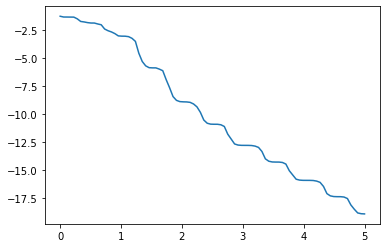

In [42]:
nbEpoch = 5 #Number of epochs

#Training of the model
err=[]
for _e in range(nbEpoch):
    err += DMRG.train(data,y) 

#Display the evolution of the error
sweeps=np.linspace(0,nbEpoch,len(err))
plt.plot(sweeps,np.log(err))
plt.show()

## Evaluation of the model

In [27]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [43]:
import tensorly as tl

In [44]:
acc = DMRG.accuracy(data,y) #Computation of the accuray

print("Accuracy : ",acc*100,"%.")

Accuracy :  100.0 %.


## Make prediction

In [45]:
new_label = DMRG.predict(data) #Computation of the value of the decision function the inputs of data